# PCA Visualization of Airfoil Self-Noise Dataset

This notebook performs Principal Component Analysis (PCA) on the 5 input features of the NASA Airfoil Self-Noise Dataset and visualizes the 2D projection colored by the output value (Sound Pressure Level).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

## Load the Dataset

In [3]:
# Load the airfoil self-noise dataset
# Columns: Frequency, Angle of Attack, Chord Length, Free-stream Velocity, 
#          Suction Side Displacement Thickness, Sound Pressure Level
column_names = [
    'Frequency (Hz)',
    'Angle of Attack (deg)',
    'Chord Length (m)',
    'Free-stream Velocity (m/s)',
    'Suction Side Displacement Thickness (m)',
    'Sound Pressure Level (dB)'
]

# Load data from the public folder
df = pd.read_csv('../public/airfoil_self_noise.dat', 
                 sep='\\t', 
                 header=None, 
                 names=column_names)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1503, 6)


/tmp/ipykernel_163095/870306068.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../public/airfoil_self_noise.dat',


,Frequency (Hz),Angle of Attack (deg),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement Thickness (m),Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
# Summary statistics
df.describe()

,Frequency (Hz),Angle of Attack (deg),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement Thickness (m),Sound Pressure Level (dB)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


## Normalize Features

PCA is sensitive to feature scales, so we normalize the input features before applying PCA. The **output value (Sound Pressure Level) is NOT normalized** - we keep it in original units (dB) for interpretable coloring.

Available normalization methods:
- **Z-score (StandardScaler)**: Centers data to mean=0, std=1
- **Min-Max**: Scales data to [0, 1] range

In [5]:
# Separate features and target
feature_cols = column_names[:-1]  # First 5 columns are features
target_col = column_names[-1]     # Last column is target

X = df[feature_cols].values
y = df[target_col].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target range: {y.min():.2f} to {y.max():.2f} dB")

Features shape: (1503, 5)
Target shape: (1503,)
Target range: 103.38 to 140.99 dB


In [6]:
# Choose normalization method: 'zscore' or 'minmax'
NORMALIZATION_METHOD = 'zscore'  # Change to 'minmax' to use Min-Max scaling

# Apply normalization to features only (NOT to target)
if NORMALIZATION_METHOD == 'zscore':
    scaler = StandardScaler()
    norm_name = "Z-score (mean=0, std=1)"
elif NORMALIZATION_METHOD == 'minmax':
    scaler = MinMaxScaler()
    norm_name = "Min-Max [0, 1]"
else:
    raise ValueError(f"Unknown normalization: {NORMALIZATION_METHOD}")

X_normalized = scaler.fit_transform(X)

# Show before/after normalization comparison
print(f"Normalization method: {norm_name}")
print(f"\nFeature statistics BEFORE normalization:")
print(f"  {'Feature':<45} {'Min':>10} {'Max':>10} {'Mean':>10} {'Std':>10}")
print("-" * 90)
for i, col in enumerate(feature_cols):
    print(f"  {col:<45} {X[:, i].min():>10.4f} {X[:, i].max():>10.4f} {X[:, i].mean():>10.4f} {X[:, i].std():>10.4f}")

print(f"\nFeature statistics AFTER normalization:")
print(f"  {'Feature':<45} {'Min':>10} {'Max':>10} {'Mean':>10} {'Std':>10}")
print("-" * 90)
for i, col in enumerate(feature_cols):
    print(f"  {col:<45} {X_normalized[:, i].min():>10.4f} {X_normalized[:, i].max():>10.4f} {X_normalized[:, i].mean():>10.4f} {X_normalized[:, i].std():>10.4f}")

print(f"\nTarget (Sound Pressure Level) - NOT normalized:")
print(f"  Range: {y.min():.2f} to {y.max():.2f} dB (original values used for coloring)")

Normalization method: Z-score (mean=0, std=1)

Feature statistics BEFORE normalization:
  Feature                                              Min        Max       Mean        Std
------------------------------------------------------------------------------------------
  Frequency (Hz)                                  200.0000 20000.0000  2886.3806  3151.5242
  Angle of Attack (deg)                             0.0000    22.2000     6.7823     5.9162
  Chord Length (m)                                  0.0254     0.3048     0.1365     0.0935
  Free-stream Velocity (m/s)                       31.7000    71.3000    50.8607    15.5676
  Suction Side Displacement Thickness (m)           0.0004     0.0584     0.0111     0.0131

Feature statistics AFTER normalization:
  Feature                                              Min        Max       Mean        Std
------------------------------------------------------------------------------------------
  Frequency (Hz)                             

## Perform PCA on Normalized Features

In [7]:
# Apply PCA to NORMALIZED features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

print(f"PCA applied to normalized features ({norm_name})")
print(f"\nExplained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")

PCA applied to normalized features (Z-score (mean=0, std=1))

Explained variance ratio:
  PC1: 42.19%
  PC2: 22.48%
  Total: 64.67%


In [8]:
# Show PCA component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_cols
)
print("PCA Component Loadings:")
loadings

PCA Component Loadings:


,PC1,PC2
Frequency (Hz),-0.278376,0.622094
Angle of Attack (deg),0.647813,0.093818
Chord Length (m),-0.409188,-0.323377
Free-stream Velocity (m/s),-0.002699,0.706156
Suction Side Displacement Thickness (m),0.579139,-0.031109


## Visualize PCA Projection

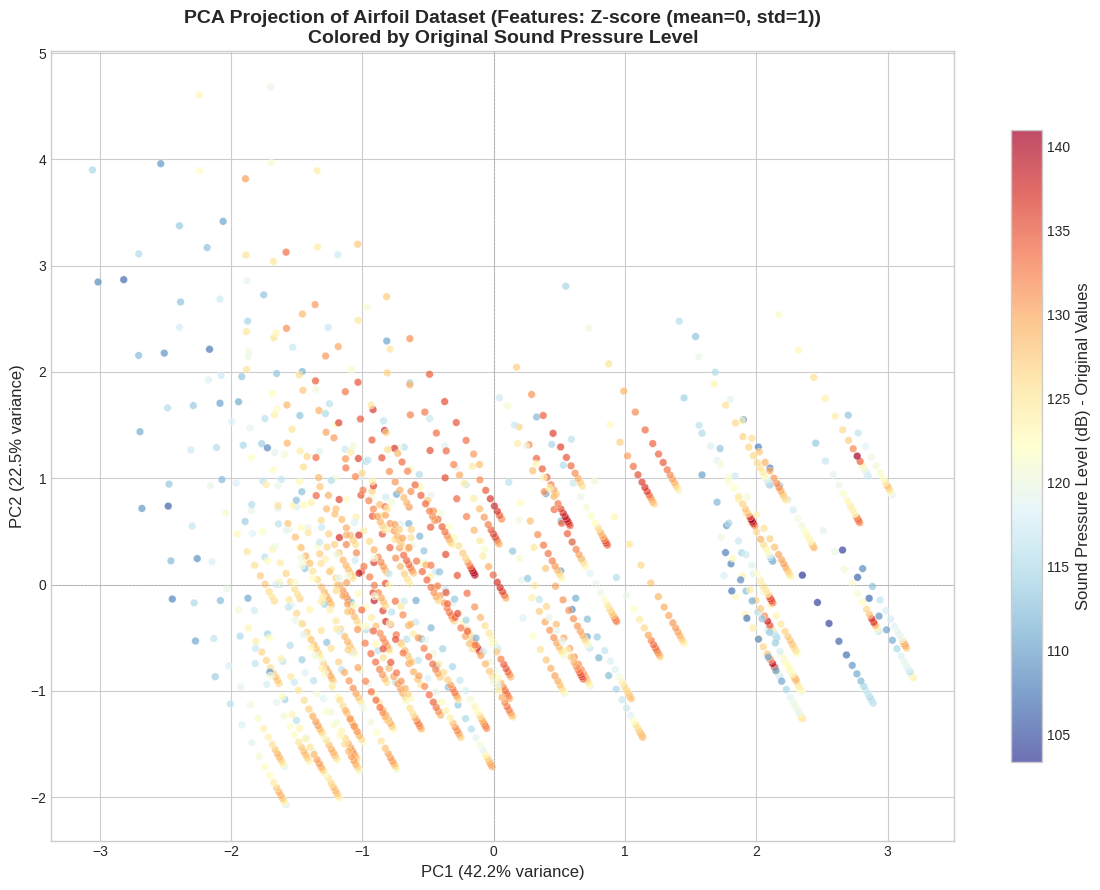


Note: PCA computed on normalized features (Z-score (mean=0, std=1))
      Color shows original SPL values: 103.4 - 141.0 dB


In [9]:
# Create PCA scatter plot colored by ORIGINAL Sound Pressure Level (not normalized)
fig, ax = plt.subplots(figsize=(12, 9))

# Create scatter plot - using original y values for color
scatter = ax.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=y,  # Original SPL values in dB
    cmap='RdYlBu_r',  # Red (high) to Blue (low)
    alpha=0.7,
    s=30,
    edgecolors='white',
    linewidths=0.3
)

# Add colorbar with original units
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Sound Pressure Level (dB) - Original Values', fontsize=12)

# Labels and title
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
ax.set_title(f'PCA Projection of Airfoil Dataset (Features: {norm_name})\nColored by Original Sound Pressure Level', 
             fontsize=14, fontweight='bold')

# Add grid
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig('pca_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nNote: PCA computed on normalized features ({norm_name})")
print(f"      Color shows original SPL values: {y.min():.1f} - {y.max():.1f} dB")

## Additional Analysis: All Principal Components

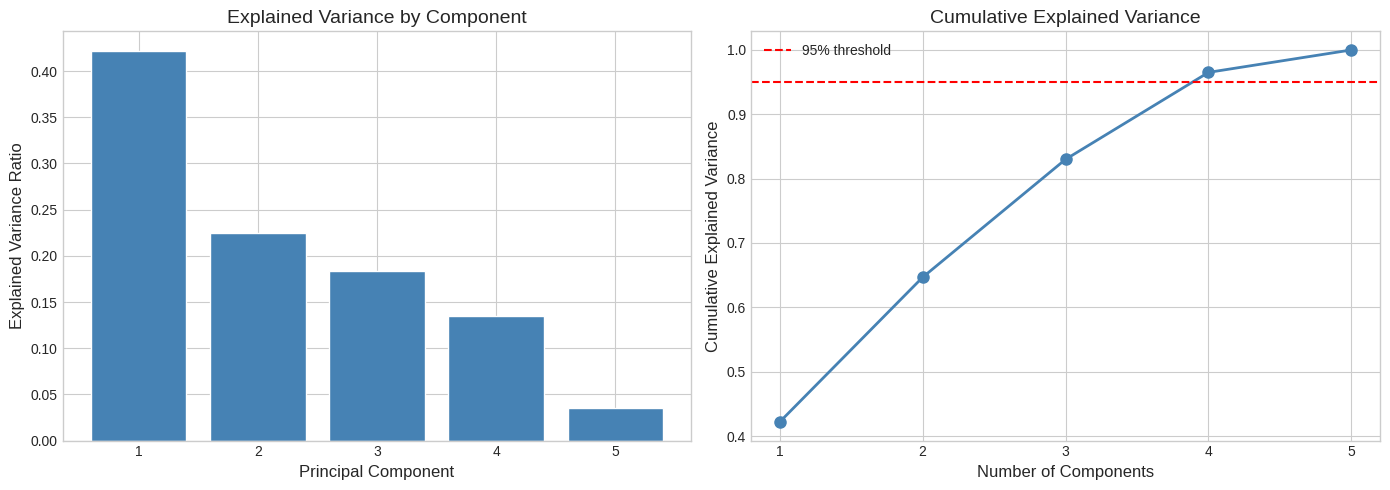


Explained variance by component:
  PC1: 42.19% (cumulative: 42.19%)
  PC2: 22.48% (cumulative: 64.67%)
  PC3: 18.33% (cumulative: 83.00%)
  PC4: 13.51% (cumulative: 96.51%)
  PC5: 3.49% (cumulative: 100.00%)


In [10]:
# Compute all 5 principal components
pca_full = PCA(n_components=5)
X_pca_full = pca_full.fit_transform(X_normalized)

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(range(1, 6), pca_full.explained_variance_ratio_, 
            color='steelblue', edgecolor='white')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Explained Variance by Component', fontsize=14)
axes[0].set_xticks(range(1, 6))

# Cumulative explained variance
cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(range(1, 6), cumulative_var, 'o-', color='steelblue', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14)
axes[1].set_xticks(range(1, 6))
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nExplained variance by component:")
for i, (var, cum_var) in enumerate(zip(pca_full.explained_variance_ratio_, cumulative_var)):
    print(f"  PC{i+1}: {var:.2%} (cumulative: {cum_var:.2%})")

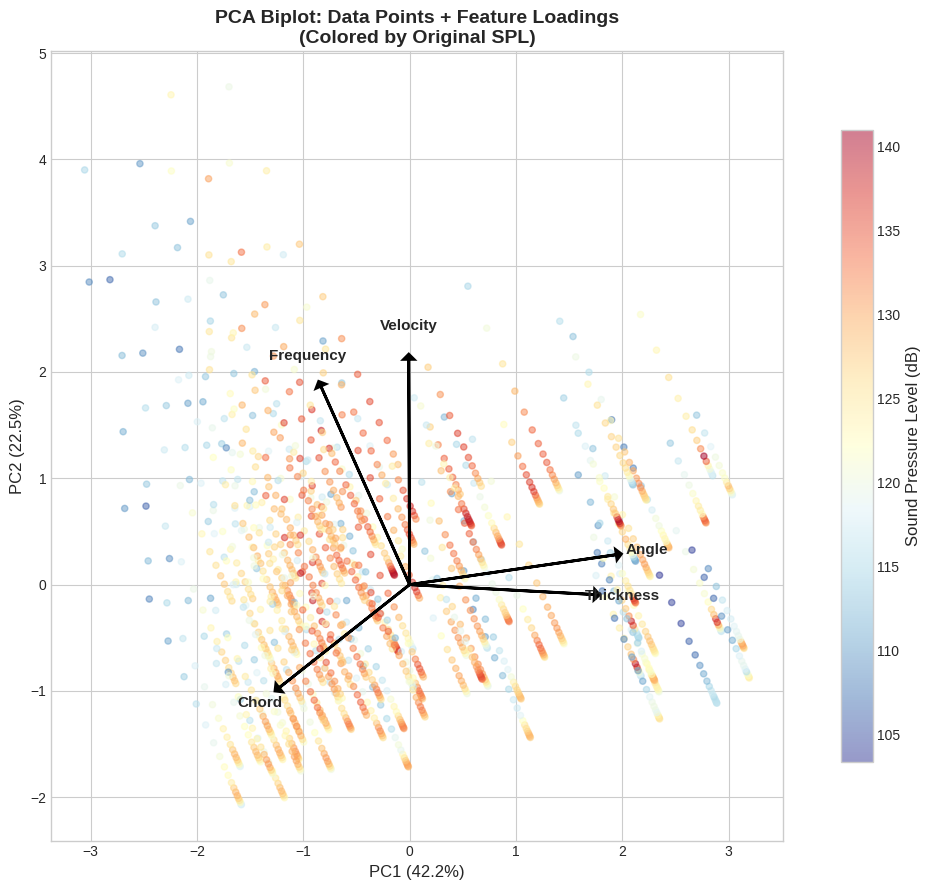

In [11]:
# Biplot: PCA with feature vectors (colored by original SPL)
fig, ax = plt.subplots(figsize=(12, 9))

# Plot data points with original SPL colors
scatter = ax.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=y,  # Original SPL values
    cmap='RdYlBu_r',
    alpha=0.5,
    s=20
)

# Plot feature vectors
feature_names_short = ['Frequency', 'Angle', 'Chord', 'Velocity', 'Thickness']
scale = 3  # Scale factor for arrows

for i, (name, loading) in enumerate(zip(feature_names_short, pca.components_.T)):
    ax.arrow(0, 0, loading[0]*scale, loading[1]*scale, 
             head_width=0.1, head_length=0.05, fc='black', ec='black', linewidth=2)
    ax.text(loading[0]*scale*1.15, loading[1]*scale*1.15, name, 
            fontsize=11, fontweight='bold', ha='center', va='center')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Sound Pressure Level (dB)', fontsize=12)

# Labels
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
ax.set_title('PCA Biplot: Data Points + Feature Loadings\n(Colored by Original SPL)', fontsize=14, fontweight='bold')

# Equal aspect ratio for proper angle interpretation
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Correlation with Target

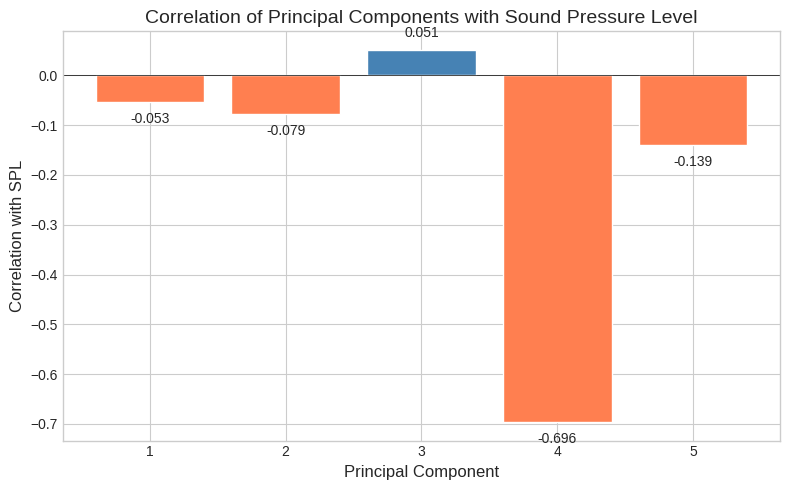

In [12]:
# Correlation of PCs with target
pc_correlations = [np.corrcoef(X_pca_full[:, i], y)[0, 1] for i in range(5)]

fig, ax = plt.subplots(figsize=(8, 5))
colors = ['steelblue' if c >= 0 else 'coral' for c in pc_correlations]
bars = ax.bar(range(1, 6), pc_correlations, color=colors, edgecolor='white')
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Correlation with SPL', fontsize=12)
ax.set_title('Correlation of Principal Components with Sound Pressure Level', fontsize=14)
ax.set_xticks(range(1, 6))

# Add value labels
for bar, corr in zip(bars, pc_correlations):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 * np.sign(height),
            f'{corr:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

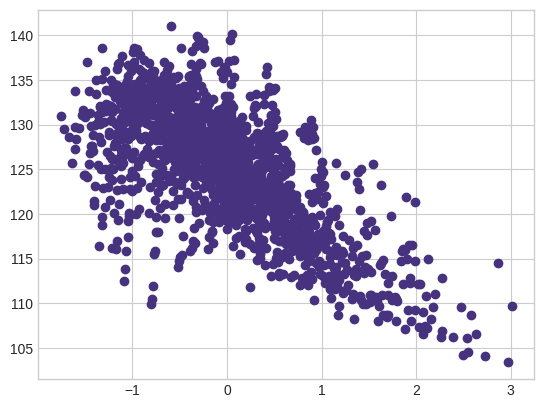

In [14]:
_ = plt.scatter(X_pca_full[:, 3], y)